In [1]:
# import libraries
import keras
import numpy as np
from utils.preprocess import *
from utils.demonstration import plot_filters
from config import *

In [2]:
# load model
target_model = "unipen_no_cap_model" if no_cap else "unipen_model"
model = keras.models.load_model(f"data/{target_model}.h5")

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 61, 61, 24)        408       
                                                                 
 max_pooling2d (MaxPooling2  (None, 30, 30, 24)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 21600)             0         
                                                                 
 dense (Dense)               (None, 128)               2764928   
                                                                 
Total params: 2765336 (10.55 MB)
Trainable params: 2765336 (10.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [4]:
for layer in model.layers:
    if len(layer.get_weights()) > 0:
        print(layer.name)
        print("Weights:", layer.get_weights()[0].shape)
        print(layer.get_weights()[0].min(), layer.get_weights()[0].max())
        print("Bias:", layer.get_weights()[1].shape)
        print(layer.get_weights()[1].min(), layer.get_weights()[1].max())

conv2d
Weights: (4, 4, 1, 24)
-0.39210546 0.1936296
Bias: (24,)
-0.2563575 0.113870576
dense
Weights: (21600, 128)
-1.4419402 0.80426735
Bias: (128,)
-0.43882173 0.3660829


[[-0.24704413 -0.08004136 -0.03551433  0.01436135]
 [-0.07036193 -0.03280225  0.06280451  0.00904078]
 [-0.2044949  -0.03356488  0.01945737 -0.02995276]
 [-0.17519328 -0.04482399 -0.0414186  -0.09471916]]


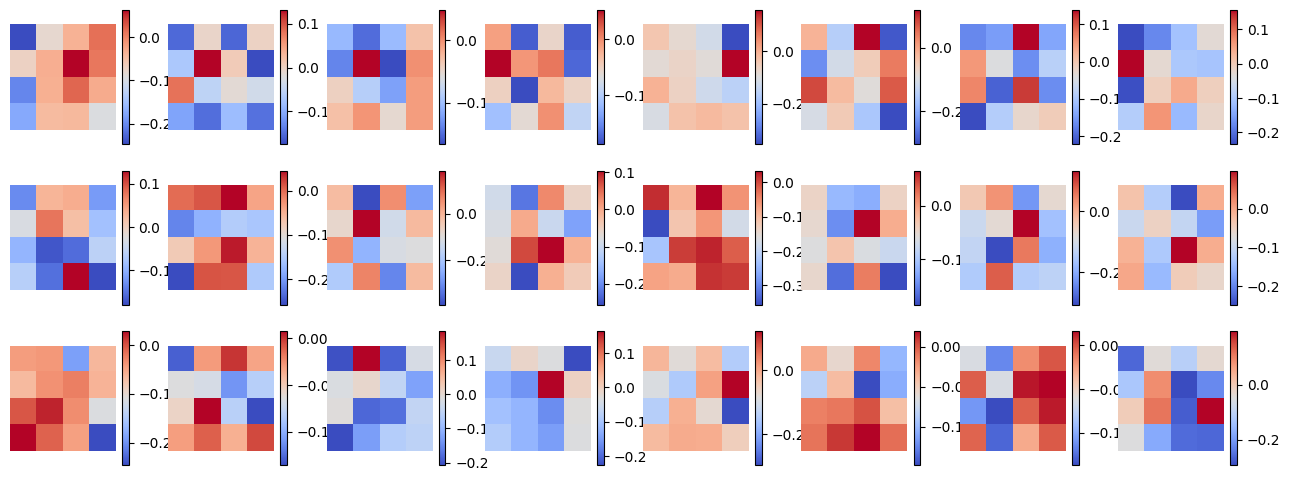

In [5]:
weights = model.layers[0].get_weights()
filters: np.array = weights[0]
print(filters[:, :, 0, 0])
plot_filters(filters, (4, 8))